In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('final_training_data.csv')

In [ ]:
df.sample(5).head()
df['text'][1762]

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# 1. Data cleaning 
# 2. Exploratory Data Analysis 
# 3. text preprocessing
# 4. Model building
# 5. Model evaluation
# 6. Improvement and tuning

## 1. Data cleaning


In [ ]:
df.info()

In [ ]:
df.sample(5)

In [ ]:
df['label'].value_counts()


In [ ]:
df.head(5)

In [ ]:
# class ImprovedATSEmailClassifier:
#     def __init__(self, max_features=10000, max_length=500):
#         self.max_features = max_features
#         self.max_length = max_length
#         self.tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
#         self.label_encoder = LabelEncoder()
#         self.model = None
#         self.num_classes = None

#     def preprocess_text(self, text):
#         """Clean text: lowercase, remove punctuation, stop words."""
#         text = text.lower()
#         text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
#         text = ' '.join([word for word in text.split() if word not in stop_words])
#         return text

#     def prepare_data(self, texts, labels):
#         """Prepare data with preprocessing."""
#         texts = [self.preprocess_text(t) for t in texts]
#         # self.tokenizer.fit_on_texts(texts)
#         if is_training:
#             self.tokenizer.fit_on_texts(texts)
#         sequences = self.tokenizer.texts_to_sequences(texts)
#         X = pad_sequences(sequences, maxlen=self.max_length)
#         y = self.label_encoder.fit_transform(labels)
#         self.num_classes = len(np.unique(y))
#         return X, y

#     def build_model(self):
#         """Improved model: Bidirectional LSTM for better sequence handling."""
#         model = Sequential([
#             Embedding(self.max_features, 128, input_length=self.max_length),
#             Bidirectional(LSTM(64, return_sequences=True)),  # Better for context
#             GlobalMaxPooling1D(),
#             Dense(128, activation='relu'),
#             Dropout(0.5),
#             Dense(64, activation='relu'),
#             Dropout(0.5),
#             Dense(self.num_classes, activation='softmax')
#         ])
#         model.compile(
#             optimizer='adam',
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy']
#         )
#         self.model = model
#         return model

#     def train(self, texts, labels, validation_split=0.2, epochs=10, batch_size=32):
#         X, y = self.prepare_data(texts, labels)
#         self.build_model()
        
#         # Class weights for imbalance
#         class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
#         class_weight_dict = dict(enumerate(class_weights))
        
#         # Early stopping to prevent overfitting
#         early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        
#         history = self.model.fit(
#             X, y,
#             validation_split=validation_split,
#             epochs=10,
#             batch_size=batch_size,
#             class_weight=class_weight_dict,
#             callbacks=[early_stop],
#             verbose=1
#         )
#         return history

#     def predict(self, texts):
#         texts = [self.preprocess_text(t) for t in texts]
#         sequences = self.tokenizer.texts_to_sequences(texts)
#         X = pad_sequences(sequences, maxlen=self.max_length)
#         predictions = self.model.predict(X)
#         predicted_classes = np.argmax(predictions, axis=1)
#         return self.label_encoder.inverse_transform(predicted_classes)

#     def evaluate(self, texts, labels):
#         texts = [self.preprocess_text(t) for t in texts]
#         sequences = self.tokenizer.texts_to_sequences(texts)
#         X = pad_sequences(sequences, maxlen=self.max_length)
#         y = self.label_encoder.transform(labels)
#         predictions = self.model.predict(X)
#         predicted_classes = np.argmax(predictions, axis=1)
        
#         print("Classification Report:")
#         print(classification_report(y, predicted_classes, target_names=self.label_encoder.classes_))
        
#         cm = confusion_matrix(y, predicted_classes)
#         plt.figure(figsize=(12, 8))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                    xticklabels=self.label_encoder.classes_,
#                    yticklabels=self.label_encoder.classes_)
#         plt.title('Confusion Matrix')
#         plt.ylabel('Actual')
#         plt.xlabel('Predicted')
#         plt.xticks(rotation=45)
#         plt.yticks(rotation=0)
#         plt.tight_layout()
#         plt.show()

In [ ]:
print(df['label'].value_counts())

# LSTM MODEL 

## This is the main code

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, Bidirectional
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.utils.class_weight import compute_class_weight
# import matplotlib.pyplot as plt
# import seaborn as sns
# import re
# import nltk
# from nltk.corpus import stopwords
# from tensorflow.keras.layers import Attention


# # Download stopwords if needed
# # nltk.download('stopwords')
# # stop_words = set(stopwords.words('english'))
# try:
#     stop_words = set(stopwords.words('english'))
# except LookupError:
#     nltk.download('stopwords')
#     stop_words = set(stopwords.words('english'))


# class ImprovedATSEmailClassifier:
#     def __init__(self, max_features=20000, max_length=500):
#         self.max_features = max_features
#         self.max_length = max_length
#         self.tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
#         self.label_encoder = LabelEncoder()
#         self.model = None
#         self.num_classes = None

#     def preprocess_text(self, text):
#         # Convert to string and cap length (PROTECTION STEP)
#         text = str(text)[:5000]

#         # Normalize
#         text = text.lower()

#         # Keep meaningful characters (emails, %, numbers)
#         text = re.sub(r'[^a-zA-Z0-9@._%+-]', ' ', text)

#         # Optional: keep stopwords for LSTM context (recommended)
#         # If you keep stopword removal, do it AFTER truncation
#         text = ' '.join(word for word in text.split() if word not in stop_words)

#         return text


#     def prepare_data(self, texts, labels=None, is_training=True):
#         """Prepare data with preprocessing. Added is_training logic."""
#         processed_texts = [self.preprocess_text(t) for t in texts]
        
#         # FIX: Only fit the dictionary during the training phase
#         if is_training:
#             self.tokenizer.fit_on_texts(processed_texts)
        
#         sequences = self.tokenizer.texts_to_sequences(processed_texts)
#         X = pad_sequences(sequences, maxlen=self.max_length)
        
#         if labels is not None:
#             if is_training:
#                 y = self.label_encoder.fit_transform(labels)
#                 self.num_classes = len(np.unique(y))
#             else:
#                 unknown_labels = set(labels) - set(self.label_encoder.classes_)
#                 if unknown_labels:
#                     raise ValueError(
#                         f"Unknown label(s) detected: {unknown_labels}. "
#                         "Model was not trained on these classes."
#                 )
#                 y = self.label_encoder.transform(labels)
#             return X, y
#         return X

#     def build_model(self):
#         # Input layer
#         inputs = Input(shape=(self.max_length,))

#         # Embedding
#         x = Embedding(
#             input_dim=min(self.max_features, len(self.tokenizer.word_index) + 1),
#             output_dim=128
#         )(inputs)

#         # BiLSTM
#         x = Bidirectional(LSTM(64, return_sequences=True))(x)

#         # Self-attention
#         x = Attention()([x, x])

#         # Reduce sequence dimension
#         x = tf.reduce_mean(x, axis=1)

#         # Dense layers
#         x = Dense(128, activation='relu')(x)
#         x = Dropout(0.5)(x)
#         x = Dense(64, activation='relu')(x)
#         x = Dropout(0.5)(x)

#         # Output
#         outputs = Dense(self.num_classes, activation='softmax')(x)

#         # Build model
#         model = Model(inputs=inputs, outputs=outputs)

#         model.compile(
#             optimizer='adam',
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy']
#         )

#         self.model = model
#         return model
    
#     def train(self, X_train, y_train,X_val,epochs=10,batch_size=32):
#          # Prepare training data
#         X_tr, y_tr = self.prepare_data(X_train, y_train, is_training=True)
        
#         # Prepare validation data (NO fitting here)
#         X_v, y_v = self.prepare_data(X_val, y_val, is_training=False)

#         # 2. Debug label mapping
#         mapping = dict(zip(self.label_encoder.classes_, range(len(self.label_encoder.classes_))))
#         print(f"\n[DEBUG] Label Mapping is: {mapping}")
        
#         # 3. Build and compile the model
#         self.build_model()
        
#         # 4. Calculate class weights for balance
#         class_weights = compute_class_weight(
#             class_weight='balanced',
#             classes=np.unique(y_tr),
#             y=y_tr
#         )
#         class_weight_dict = dict(enumerate(class_weights))
        
#         # 5. Setup Early Stopping to prevent overfitting
#         early_stop = tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss', 
#             patience=3, 
#             restore_best_weights=True
#         )
        
#          # Train
#         history = self.model.fit(
#             X_tr,
#             y_tr,
#             validation_data=(X_v, y_v),
#             epochs=epochs,
#             batch_size=batch_size,
#             class_weight=class_weight_dict,
#             callbacks=[early_stop],
#             verbose=1
#         )
#         return history

#     def predict(self, texts):
#         # Pass is_training=False to keep the tokenizer dictionary locked
#         X = self.prepare_data(texts, labels=None, is_training=False)
#         predictions = self.model.predict(X)
#         predicted_classes = np.argmax(predictions, axis=1)
#         return self.label_encoder.inverse_transform(predicted_classes)

#     # def evaluate(self, texts, labels):
#     #     # Pass is_training=False for evaluation
#     #     X, y = self.prepare_data(texts, labels, is_training=False)
#     #     predictions = self.model.predict(X)
#     #     predicted_classes = np.argmax(predictions, axis=1)
#     #     print(classification_report(y, predicted_classes, target_names=self.label_encoder.classes_))
    
#     # def predict_probabilities(self, texts):
#     #     X = self.prepare_data(texts, labels=None, is_training=False)
#     #     preds = self.model.predict(X)
#     #     for i, p in enumerate(preds):
#     #         print(f"Text: {texts[i][:50]}...")
#     #         for j, class_name in enumerate(self.label_encoder.classes_):
#     #             print(f" - {class_name}: {p[j]*100:.2f}%")

#     def evaluate(self, texts, labels):
#         """Prints classification report and plots a Confusion Matrix heatmap."""
#         X, y = self.prepare_data(texts, labels, is_training=False)
#         predictions = self.model.predict(X)
#         predicted_classes = np.argmax(predictions, axis=1)
        
#         # 1. Classification Report
#         print("\n" + "="*30)
#         print("CLASSIFICATION REPORT")
#         print("="*30)
#         print(classification_report(y, predicted_classes, target_names=self.label_encoder.classes_, digits =4))
        
#         # 2. Confusion Matrix
#         cm = confusion_matrix(y, predicted_classes)
#         plt.figure(figsize=(10, 8))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#                     xticklabels=self.label_encoder.classes_, 
#                     yticklabels=self.label_encoder.classes_)
#         plt.title('Confusion Matrix: Actual vs. Predicted')
#         plt.ylabel('Actual Category')
#         plt.xlabel('Predicted Category')
#         plt.show()

#     def predict_probabilities(self, texts):
#         """Shows exactly how confident the model is for every category."""
#         X = self.prepare_data(texts, labels=None, is_training=False)
#         preds = self.model.predict(X)
        
#         print("\n" + "="*30)
#         print("CONFIDENCE SCORES")
#         print("="*30)
#         for i, p in enumerate(preds):
#             print(f"Text snippet: '{texts[i][:60]}...'")
#             # Sort by highest confidence
#             sorted_indices = np.argsort(p)[::-1]
#             for idx in sorted_indices:
#                 class_name = self.label_encoder.classes_[idx]
#                 confidence = p[idx] * 100
#                 print(f"  --> {class_name}: {confidence:.2f}%")
#             print("-" * 20)

# # Load data from CSV (assuming columns are 'category' and the email text column; adjust if needed)
# # df = pd.read_csv('final_training_data.csv')
# # Load data
# df = pd.read_csv('final_training_data1.csv')
# df.columns = ['label', 'text']

# # 1️⃣ Drop NaNs FIRST
# df = df.dropna(subset=['text', 'label'])

# # 2️⃣ Drop duplicate emails
# df = df.drop_duplicates(subset=['text'])

# # 3️⃣ Shuffle dataset (important before capping)
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# # 4️⃣ Cap samples per category (balanced dataset)
# MAX_PER_CLASS = 450
# df = df.groupby('label').head(MAX_PER_CLASS)

# # 5️⃣ Verify distribution
# print("Final label distribution:")
# print(df['label'].value_counts())

# # df = df.dropna(subset=['text'])
# texts = df['text'].tolist()
# labels = df['label'].tolist()

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)

# # Train model
# classifier = ImprovedATSEmailClassifier()
# history = classifier.train(X_train, y_train, epochs=10)

# # Evaluate
# classifier.evaluate(X_test, y_test)

# # Plot training history
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Test prediction
# # test_email = "I am applying for the data analyst position. Attached is my resume."
# # print(f"Predicted Category: {classifier.predict([test_email])[0]}")
# # test_email = "I am applying for the offer offer buy this car get a gift free. Attached is my resume."
# # print(f"Predicted Category: {classifier.predict([test_email])[0]}") 

# # ... (Previous training code) ...

# # 1. Run evaluation (This will now show the Confusion Matrix plot)
# # classifier.evaluate(X_test, y_test)

# # 2. Test specific emails with CONFIDENCE NUMBERS
# test_emails = [
#     "I am applying for the data analyst position. Attached is my resume.",
#     "I am applying for the offer offer buy this car get a gift free. Attached is my resume."
# ]

# classifier.predict_probabilities(test_emails)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Dense, Dropout, Embedding, LSTM,
    Bidirectional, Attention,
    GlobalAveragePooling1D, Input
)
from tensorflow.keras.models import Model


In [ ]:
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))


In [ ]:
class ImprovedATSEmailClassifier:
    def __init__(self, max_features=8000, max_length=500):
        self.max_features = max_features
        self.max_length = max_length
        self.tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
        self.label_encoder = LabelEncoder()
        self.model = None
        self.num_classes = None

    # def preprocess_text(self, text):
    #     text = str(text)[:5000]
    #     text = text.lower()
    #     text = re.sub(r'[^a-zA-Z0-9@._%+-]', ' ', text)
    #     text = ' '.join(w for w in text.split() if w not in stop_words)
    #     return text
    def preprocess_text(self, text):
        text = str(text)[:5000]
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9@._%+-]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()


    def prepare_data(self, texts, labels=None, is_training=True):
        texts = [self.preprocess_text(t) for t in texts]

        if is_training:
            self.tokenizer.fit_on_texts(texts)

        sequences = self.tokenizer.texts_to_sequences(texts)
        X = pad_sequences(sequences, maxlen=self.max_length)

        if labels is not None:
            if is_training:
                y = self.label_encoder.fit_transform(labels)
                self.num_classes = len(np.unique(y))
            else:
                unknown = set(labels) - set(self.label_encoder.classes_)
                if unknown:
                    raise ValueError(f"Unknown labels detected: {unknown}")
                y = self.label_encoder.transform(labels)
            return X, y

        return X

    def build_model(self):
        inputs = Input(shape=(self.max_length,))
        x = Embedding(
            input_dim=min(self.max_features, len(self.tokenizer.word_index) + 1),
            output_dim=128
        )(inputs)

        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        # x = Attention()([x, x])
        x = GlobalAveragePooling1D()(x)

        x = Dense(64, activation='relu')(x)
        x = Dropout(0.3)(x)
        # x = Dense(64, activation='relu')(x)
        # x = Dropout(0.3)(x)

        outputs = Dense(self.num_classes, activation='softmax')(x)

        self.model = Model(inputs, outputs)
        self.model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

    def train(self, X_train, y_train, X_val, y_val, epochs=15, batch_size=32):
        X_tr, y_tr = self.prepare_data(X_train, y_train, is_training=True)
        X_v, y_v = self.prepare_data(X_val, y_val, is_training=False)

        self.build_model()

        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(y_tr),
            y=y_tr
        )
        class_weight = dict(enumerate(class_weights))

        early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            
            patience=4,
            restore_best_weights=True
        )

        return self.model.fit(
            X_tr, y_tr,
            validation_data=(X_v, y_v),
            epochs=epochs,
            batch_size=batch_size,
            class_weight=class_weight,
            callbacks=[early_stop],
            verbose=1
        )

    def evaluate(self, texts, labels):
        X, y = self.prepare_data(texts, labels, is_training=False)
        preds = np.argmax(self.model.predict(X), axis=1)

        print(classification_report(
            y, preds,
            target_names=self.label_encoder.classes_,
            digits=4
        ))

        cm = confusion_matrix(y, preds)
        sns.heatmap(cm, annot=True, fmt='d',
                    xticklabels=self.label_encoder.classes_,
                    yticklabels=self.label_encoder.classes_)
        plt.show()

    def predict_probabilities(self, texts):
        X = self.prepare_data(texts, is_training=False)
        preds = self.model.predict(X)

        for i, p in enumerate(preds):
            print(f"\nText: {texts[i][:60]}...")
            for idx in np.argsort(p)[::-1]:
                print(f"{self.label_encoder.classes_[idx]}: {p[idx]*100:.2f}%")


In [ ]:
df = pd.read_csv('final_training_data1.csv')
df.columns = ['label', 'text']

df = df.dropna(subset=['label', 'text'])
df = df.drop_duplicates(subset=['text'])
df = df.sample(frac=1, random_state=42)

df = df.groupby('label').head(450)

texts = df['text'].tolist()
labels = df['label'].tolist()


In [ ]:
df['label'].value_counts()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     texts, labels, test_size=0.2, stratify=labels, random_state=42
# )

# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
# )

# classifier = ImprovedATSEmailClassifier()
# history = classifier.train(X_train, y_train, X_val, y_val, epochs=10)
# classifier.evaluate(X_test, y_test)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

classifier = ImprovedATSEmailClassifier()
history = classifier.train(X_train, y_train, X_val, y_val, epochs=15)
classifier.evaluate(X_test, y_test)


In [ ]:
# ===== SAVE MODEL ARTIFACTS (RUN AFTER TRAINING) =====

import os
import json
import pickle

MODEL_DIR = "model2"
os.makedirs(MODEL_DIR, exist_ok=True)

# 1️⃣ Save trained Keras model
classifier.model.save(os.path.join(MODEL_DIR, "ats_email_model.keras"))

# 2️⃣ Save tokenizer
with open(os.path.join(MODEL_DIR, "tokenizer.pkl"), "wb") as f:
    pickle.dump(classifier.tokenizer, f)

# 3️⃣ Save label encoder
with open(os.path.join(MODEL_DIR, "label_encoder.pkl"), "wb") as f:
    pickle.dump(classifier.label_encoder, f)

# 4️⃣ Save config (important for inference)
config = {
    "max_features": classifier.max_features,
    "max_length": classifier.max_length
}

with open(os.path.join(MODEL_DIR, "config.json"), "w") as f:
    json.dump(config, f, indent=4)

print("✅ Model, tokenizer, label encoder, and config saved in 'model/' folder")


# This the downloaded data for spam as emails,csv from kaggle


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===== LOAD CSV =====
csv_path = "emails.csv"   # change if needed
df = pd.read_csv(csv_path)

# Columns in your CSV
texts = df["text"].astype(str).tolist()
true_labels = df["spam"].astype(int).tolist()   # 1 = spam, 0 = not spam

# ===== PREPARE DATA =====
X_test = classifier.prepare_data(texts, is_training=False)

# ===== PREDICT =====
y_pred_probs = classifier.model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# ===== MAP MODEL OUTPUT TO BINARY =====
# Adjust this if your label_encoder mapping is different
label_map = {
    "spam": 1,
    "not_spam": 0,
    "job_application": 0,
    "interview_scheduling": 0,
    "candidate_selection": 0,
    "new_requisition": 0
}

y_pred_binary = [
    label_map[classifier.label_encoder.classes_[i]] for i in y_pred
]

# ===== METRICS =====
total = len(true_labels)
correct = sum(t == p for t, p in zip(true_labels, y_pred_binary))
wrong = total - correct

correct_pct = (correct / total) * 100
wrong_pct = (wrong / total) * 100
accuracy = accuracy_score(true_labels, y_pred_binary)

# ===== OUTPUT =====
print("📊 MODEL TEST RESULTS")
print("-" * 35)
print(f"Total Samples        : {total}")
print(f"Correct Predictions  : {correct} ({correct_pct:.2f}%)")
print(f"Wrong Predictions    : {wrong} ({wrong_pct:.2f}%)")
print(f"Overall Accuracy     : {accuracy:.4f}")

# ===== CLASSIFICATION REPORT =====
print("\n📄 Classification Report:\n")
print(classification_report(
    true_labels,
    y_pred_binary,
    target_names=["not_spam", "spam"],
    digits=4
))

# ===== CONFUSION MATRIX =====
cm = confusion_matrix(true_labels, y_pred_binary)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["not_spam", "spam"],
    yticklabels=["not_spam", "spam"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Spam Classification Confusion Matrix")
plt.show()


# changes Made by Ayush

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Dense, Dropout, Embedding, LSTM,
    Bidirectional, GlobalAveragePooling1D, Input, Concatenate
)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

class ImprovedATSEmailClassifier:
    def __init__(self, max_features=8000, max_length=500, embedding_dim=128):
        self.max_features = max_features
        self.max_length = max_length
        self.embedding_dim = embedding_dim
        self.tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
        self.label_encoder = LabelEncoder()
        self.model = None
        self.num_classes = None

    # More comprehensive preprocessing
    def preprocess_text(self, text):
        text = str(text)[:5000] # Limit length to prevent memory issues
        text = text.lower()
        # Expand contractions (basic example, can be improved)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"can't", "cannot", text)
        text = re.sub(r"n't", " not", text)
        text = re.sub(r"'re", " are", text)
        text = re.sub(r"'ve", " have", text)
        text = re.sub(r"'ll", " will", text)
        text = re.sub(r"'d", " would", text)
        text = re.sub(r"'m", " am", text)
        # Remove special characters, keep essential ones like @, ., +, - for emails/URLs
        text = re.sub(r'[^a-zA-Z0-9@._%+-]', ' ', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
        # Remove leading/trailing spaces
        return text.strip()

    def prepare_data(self, texts, labels=None, is_training=True):
        texts = [self.preprocess_text(t) for t in texts]

        if is_training:
            self.tokenizer.fit_on_texts(texts)

        sequences = self.tokenizer.texts_to_sequences(texts)
        X = pad_sequences(sequences, maxlen=self.max_length)

        if labels is not None:
            if is_training:
                y = self.label_encoder.fit_transform(labels)
                self.num_classes = len(np.unique(y))
                print(f"Number of classes: {self.num_classes}, Classes: {self.label_encoder.classes_}")
            else:
                # Handle unknown labels during prediction if necessary
                y = self.label_encoder.transform(labels)
            return X, y

        return X

    def build_model(self):
        # Input layer
        inputs = Input(shape=(self.max_length,))

        # Embedding layer
        embedding_layer = Embedding(
            input_dim=min(self.max_features, len(self.tokenizer.word_index) + 1),
            output_dim=self.embedding_dim,
            input_length=self.max_length,
            # Add regularization to embedding layer
            embeddings_regularizer=l2(1e-4)
        )(inputs)

        # Dropout on embeddings to prevent overfitting to specific word vectors
        embedding_layer = Dropout(0.2)(embedding_layer)

        # BiLSTM layer with return sequences for potential subsequent pooling/attention
        lstm_out = Bidirectional(
            LSTM(64, return_sequences=True, recurrent_dropout=0.2, recurrent_regularizer=l2(1e-4))
        )(embedding_layer)

        # Global Average Pooling (GAP) - Good for capturing overall meaning
        gap = GlobalAveragePooling1D()(lstm_out)

        # Dense layers with regularization and dropout
        dense1 = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(gap)
        dropout1 = Dropout(0.5)(dense1) # Higher dropout for dense layer

        dense2 = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(dropout1)
        dropout2 = Dropout(0.3)(dense2)

        # Output layer
        outputs = Dense(self.num_classes, activation='softmax')(dropout2)

        self.model = Model(inputs, outputs)
        # Using a lower learning rate initially
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        self.model.compile(
            optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        print(self.model.summary())

    def train(self, X_train, y_train, X_val, y_val, epochs=20, batch_size=32): # Increased epochs
        X_tr, y_tr = self.prepare_data(X_train, y_train, is_training=True)
        X_v, y_v = self.prepare_data(X_val, y_val, is_training=False)

        self.build_model()

        # Compute class weights (still useful)
        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(y_tr),
            y=y_tr
        )
        class_weight_dict = dict(enumerate(class_weights))
        print(f"Class Weights: {class_weight_dict}")

        # Callbacks
        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=6, # Increased patience
            restore_best_weights=True
        )
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5, # Reduce LR by half
            patience=3,
            min_lr=1e-7,
            verbose=1
        )

        history = self.model.fit(
            X_tr, y_tr,
            validation_data=(X_v, y_v),
            epochs=epochs,
            batch_size=batch_size,
            class_weight=class_weight_dict,
            callbacks=[early_stop, reduce_lr], # Added ReduceLROnPlateau
            verbose=1
        )
        return history

    def evaluate(self, texts, labels):
        X, y = self.prepare_data(texts, labels, is_training=False)
        preds = np.argmax(self.model.predict(X), axis=1)

        print("\n--- Detailed Classification Report ---")
        print(classification_report(
            y, preds,
            target_names=self.label_encoder.classes_,
            digits=4
        ))

        print("\n--- Per-Class Precision, Recall, F1-Score ---")
        precision, recall, f1, support = precision_recall_fscore_support(y, preds, average=None, labels=np.unique(y))
        for i, class_name in enumerate(self.label_encoder.classes_):
            print(f"{class_name}: P={precision[i]:.4f}, R={recall[i]:.4f}, F1={f1[i]:.4f}, Support={support[i]}")

        cm = confusion_matrix(y, preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d',
                    xticklabels=self.label_encoder.classes_,
                    yticklabels=self.label_encoder.classes_)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    def predict_probabilities(self, texts):
        X = self.prepare_data(texts, is_training=False)
        preds = self.model.predict(X)

        for i, p in enumerate(preds):
            print(f"\n--- Text {i+1}: {texts[i][:100]}... ---") # Show more of the text
            sorted_indices = np.argsort(p)[::-1]
            for idx in sorted_indices[:2]: # Show top 2 predictions
                class_name = self.label_encoder.classes_[idx]
                prob = p[idx]
                print(f"  {class_name}: {prob*100:.2f}%")
            # Add a threshold check if needed
            max_prob = np.max(p)
            if max_prob < 0.7: # Example threshold
                print(f"  [Low Confidence: Max Prob = {max_prob*100:.2f}%]")

# --- Load and Prepare Data ---
df = pd.read_csv('final_training_data1.csv')
df.columns = ['label', 'text']

df = df.dropna(subset=['label', 'text'])
df = df.drop_duplicates(subset=['text'])
df = df.sample(frac=1, random_state=42)

# --- Investigate Class Distribution BEFORE balancing ---
print("--- Original Class Distribution ---")
original_counts = df['label'].value_counts()
print(original_counts)
print(f"Total samples before balancing: {len(df)}")

# Balance the dataset by taking up to 450 samples per class (or less if fewer exist)
df_balanced = df.groupby('label').apply(lambda x: x.sample(min(len(x), 450), random_state=42)).reset_index(drop=True)

print("\n--- Balanced Class Distribution ---")
balanced_counts = df_balanced['label'].value_counts()
print(balanced_counts)
print(f"Total samples after balancing: {len(df_balanced)}")

texts = df_balanced['text'].tolist()
labels = df_balanced['label'].tolist()

# --- Split Data ---
X_train, X_temp, y_train, y_temp = train_test_split(
    texts, labels, test_size=0.3, stratify=labels, random_state=42 # Increased test size slightly
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42 # ~0.2 of total
)

print(f"\nTrain size: {len(X_train)}, Val size: {len(X_val)}, Test size: {len(X_test)}")

# --- Initialize and Train Model ---
classifier = ImprovedATSEmailClassifier(max_features=8000, max_length=500, embedding_dim=128)
history = classifier.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32)

# --- Evaluate on Test Set ---
print("\n--- Final Evaluation on Test Set ---")
classifier.evaluate(X_test, y_test)

# --- Plot Training History ---
if history:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# --- Example Prediction on New Data ---
# Replace these with your truly new data
new_texts = [
    "Dear Hiring Manager, I am writing to apply for the Data Scientist position...",
    "Subject: New Role: Content Writer (Finance)...",
    "URGENT!! You have been selected to receive a Free Trip!...",
    # Add more examples from your new data
]

print("\n--- Predictions on New Texts ---")
classifier.predict_probabilities(new_texts)

In [ ]:
import pandas as pd 
spam_emails= pd.read_csv('emails.csv')
print(spam_emails.describe())
spam_emails.head()


In [ ]:
test_emails = [
    "I am applying for the data analyst position. Attached is my resume.",
    "Buy now! Free gift offer limited time"
]
classifier.predict_probabilities(test_emails)


In [ ]:
test_emails = " unsubscribe offer offer buy this car get a gift free."
print(f"Predicted Category: {classifier.predict_probabilities(test_emails)}")

In [ ]:
test_email = " i want to  apply offer offer buy this car get a gift free."
print(f"Predicted Category: {classifier.predict([test_email])[0]}")

In [ ]:
# Add this to your ImprovedATSEmailClassifier class
def predict_probabilities(self, texts):
    X = self.prepare_data(texts, labels=None, is_training=False)
    preds = self.model.predict(X)
    for i, p in enumerate(preds):
        print(f"Text: {texts[i][:50]}...")
        for j, class_name in enumerate(self.label_encoder.classes_):
            print(f" - {class_name}: {p[j]*100:.2f}%")

# checking the working of model work


In [ ]:
import random

# A list of "tricky" emails covering all 5 labels
test_data = [
    # Testing SPAM (with job keywords)
    "I want to apply offer offer buy this car get a gift free.",
    "URGENT: Your job application requires a $500 processing fee. Click here to win!",
    
    # Testing JOB_APPLICATION (with unusual phrasing)
    "Please find my resume attached for the open position, I am very interested.",
    "Submission of candidate profile for the engineering role.",
    
    # Testing CANDIDATE_SELECTION (Internal HR talk)
    "The hiring committee has finalized the selection for the Senior Dev role.",
    "We have chosen a candidate from the final shortlist, please inform the team.",
    
    # Testing INTERVIEW_SCHEDULING (Time/Date focus)
    "Are you available for a Zoom call this Thursday at 10 AM?",
    "Confirming the technical interview for next Monday.",
    
    # Testing NEW_REQUISITION (Managerial/Internal)
    "Need approval for a new requisition for the Sales Department.",
    "Budget approved for a new headcount: please open a requisition for a Designer."
]

# Randomize the order
random.shuffle(test_data)

print("--- Multi-Label Stress Test ---")
for email in test_data:
    prediction = classifier.predict([email])[0]
    print(f"Test Text: \"{email[:60]}...\"")
    print(f"Predicted Category: {prediction}")
    print("-" * 30)

In [ ]:
import random

# A list of emails with their "True Label" for verification
test_cases = [
    {
        "email": "i want to apply offer offer buy this car get a gift free.",
        "true_label": "spam"
    },
    {
        "email": "I am applying for the data analyst position. Attached is my resume.",
        "true_label": "job_application"
    },
    {
        "email": "Are you available for a Zoom interview this Wednesday at 3 PM?",
        "true_label": "interview_scheduling"
    },
    {
        "email": "The hiring committee has finalized the selection for the Senior Lead role.",
        "true_label": "candidate_selection"
    },
    {
        "email": "We need to open a new requisition for the Marketing Manager headcount.",
        "true_label": "new_requisition"
    },
    {
        "email": "Claim your inheritance! We just need your bank details to send the funds.",
        "true_label": "spam"
    }
]

# Randomize the test order
random.shuffle(test_cases)

print(f"{'TRUE LABEL':<25} | {'PREDICTED':<25} | {'STATUS'}")
print("-" * 70)

for case in test_cases:
    text = case["email"]
    true_lbl = case["true_label"]
    
    # Get prediction from your trained classifier
    predicted_lbl = classifier.predict([text])[0]
    
    # Check if the model was correct
    status = "✅ CORRECT" if predicted_lbl == true_lbl else "❌ WRONG"
    
    print(f"{true_lbl:<25} | {predicted_lbl:<25} | {status}")
    if status == "❌ WRONG":
        print(f"   └─ Text: \"{text}\"")

In [ ]:
test_email = " for the offer offer buy this car get a gift free.test_email "
print(f"Predicted Category: {classifier.predict([test_email])[0]}")  
print(f"Predicted Category: {classifier.predict([test_email])[0]}") 

In [ ]:
# Create a fresh test list
test_emails = [
    "I am applying for the data analyst position. Attached is my resume.",
    "WINNER! You have a gift waiting. Click here to claim your car offer now!"
]

# Use the predict method
# This calls prepare_data(is_training=False) internally
results = classifier.predict(test_emails)

for email, category in zip(test_emails, results):
    print(f"Text: {email[:50]}...")
    print(f"RESULT: {category}\n")

In [ ]:
# import pickle

# # 1. Save the Keras Model (The neural network weights)
# # Using .keras is the modern standard for TensorFlow/Keras
# classifier.model.save('improved_ats_model.keras')

# # 2. Save the Tokenizer (The dictionary mapping words to numbers)
# with open('tokenizer.pkl', 'wb') as handle:
#     pickle.dump(classifier.tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # 3. Save the Label Encoder (The mapping of numbers back to "Spam", "Job", etc.)
# with open('label_encoder.pkl', 'wb') as handle:
#     pickle.dump(classifier.label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

# print("All components (Model, Tokenizer, Label Encoder) saved successfully!")

In [ ]:
# Test prediction on sample emails from each category
unique_categories = df['category'].unique()
print("Testing predictions for sample emails from each category:")
for cat in unique_categories:
    sample_email = df[df['category'] == cat]['email_text'].sample(1).values[0][:200]  # Take first 200 chars for brevity
    predicted = classifier.predict([sample_email])[0]
    print(f"Category: {cat}")
    print(f"Sample Email: {sample_email}...")
    print(f"Predicted: {predicted}")
    print("-" * 50)

In [ ]:
# import pandas as pd
# # from pydantic_settings import BaseSettings
# from ydata_profiling import ProfileReport  
# df = pd.read_csv('final_training_data.csv')
# profile = ProfileReport(df, title="Pandas Profiling Report")    
# profile.to_file("final_training_data_report.html")

In [ ]:
df = pd.read_csv('final_training_data.csv')
df.head()

## added L2 Regularization

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2  # <--- NEW: Import for regularization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if needed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

class ImprovedATSEmailClassifier:
    def __init__(self, max_features=10000, max_length=500):
        self.max_features = max_features
        self.max_length = max_length
        self.tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
        self.label_encoder = LabelEncoder()
        self.model = None
        self.num_classes = None

    def preprocess_text(self, text):
        """
        Clean text AND remove the 'cheat words' used to label the data.
        This forces the model to learn from context, not just keywords.
        """
        text = str(text).lower()
        
        # --- NEW: THE CHEAT SHEET SCRUBBER ---
        # These are the exact words used to create the labels. 
        # We replace them with [MASK] so the model has to look at the surrounding words.
        cheat_words = [
            'resume', 'cv', 'interview', 'schedule', 'availability', 
            'requisition', 'headcount', 'spam', 'unsubscribe', 'click here'
        ]
        for word in cheat_words:
            text = text.replace(word, '') 
        # -------------------------------------

        text = re.sub(r'[^\w\s]', '', text)
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text

    def prepare_data(self, texts, labels=None, is_training=True):
        processed_texts = [self.preprocess_text(t) for t in texts]
        
        if is_training:
            self.tokenizer.fit_on_texts(processed_texts)
        
        sequences = self.tokenizer.texts_to_sequences(processed_texts)
        X = pad_sequences(sequences, maxlen=self.max_length)
        
        if labels is not None:
            if is_training:
                y = self.label_encoder.fit_transform(labels)
                self.num_classes = len(np.unique(y))
            else:
                y = self.label_encoder.transform(labels)
            return X, y
        return X

    def build_model(self):
        """
        Added L2 Regularization and reduced complexity.
        This penalizes the model for being too confident about simple patterns.
        """
        model = Sequential([
            # Reduced embedding size to 64 to create a "bottleneck"
            Embedding(self.max_features, 64, input_length=self.max_length),
            
            # Added L2 Regularization (kernel_regularizer)
            Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01))),
            GlobalMaxPooling1D(),
            
            # Added L2 to Dense layers too
            Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
            Dropout(0.6), # Increased Dropout to 60%
            
            Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
            Dropout(0.6),
            
            Dense(self.num_classes, activation='softmax')
        ])
        
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
        )
        self.model = model
        return model

    def train(self, texts, labels, validation_split=0.2, epochs=15, batch_size=32):
        X, y = self.prepare_data(texts, labels, is_training=True)
        self.build_model()
        
        class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
        class_weight_dict = dict(enumerate(class_weights))
        
        early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=3, 
            restore_best_weights=True
        )
        
        history = self.model.fit(
            X, y,
            validation_split=validation_split,
            epochs=epochs,
            batch_size=batch_size,
            class_weight=class_weight_dict,
            callbacks=[early_stop],
            verbose=1
        )
        return history

    def predict(self, texts):
        X = self.prepare_data(texts, labels=None, is_training=False)
        predictions = self.model.predict(X)
        predicted_classes = np.argmax(predictions, axis=1)
        return self.label_encoder.inverse_transform(predicted_classes)

    def evaluate(self, texts, labels):
        X, y = self.prepare_data(texts, labels, is_training=False)
        predictions = self.model.predict(X)
        predicted_classes = np.argmax(predictions, axis=1)
        
        print("Classification Report:")
        print(classification_report(y, predicted_classes, target_names=self.label_encoder.classes_))
        
        # 
        cm = confusion_matrix(y, predicted_classes)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.label_encoder.classes_,
                    yticklabels=self.label_encoder.classes_)
        plt.title('Confusion Matrix (Regularized Model)')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

# --- RUNNING THE CODE ---
# --- CORRECTED DATA LOADING SECTION ---

# 1. Load the data
df = pd.read_csv('final_training_data.csv')

# 2. Rename columns based on your file structure (Label is 1st, Text is 2nd)
# Your snippet shows: column 0 = label, column 1 = text
df.columns = ['label', 'text'] 

# 3. Verify it looks right before continuing
print("--- Data Preview ---")
print(df.head(2))

# 4. Filter and Prepare
df = df.dropna(subset=['text'])
df = df[df['text'].str.len() > 20] # Remove empty/short rows

texts = df['text'].tolist()
labels = df['label'].tolist()

# 5. Split and Train
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training on {len(X_train)} emails, Testing on {len(X_test)} emails.")

classifier = ImprovedATSEmailClassifier()
# Train for 15 epochs since we made the task harder with regularization
history = classifier.train(X_train, y_train, epochs=15) 

# Evaluate
classifier.evaluate(X_test, y_test)

In [ ]:
test_email = " for the offer offer buy this car get a gift free.test_email "
print(f"Predicted Category: {classifier.predict([test_email])[0]}")  
print(f"Predicted Category: {classifier.predict([test_email])[0]}") 

# Lightweight GRU architecture

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, SpatialDropout1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

class ImprovedATSEmailClassifier:
    def __init__(self, max_features=3000, max_length=300):
        # Reduced max_features and length to prevent overfitting on small data
        self.max_features = max_features
        self.max_length = max_length
        self.tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
        self.label_encoder = LabelEncoder()
        self.model = None
        self.num_classes = None

    def preprocess_text(self, text):
        """Clean text: lowercase, remove punctuation, stop words."""
        text = str(text).lower()
        # Remove special characters and numbers
        text = re.sub(r'[^a-z\s]', '', text)
        # Remove stopwords
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text

    def prepare_data(self, texts, labels=None, is_training=True):
        processed_texts = [self.preprocess_text(t) for t in texts]
        
        if is_training:
            self.tokenizer.fit_on_texts(processed_texts)
        
        sequences = self.tokenizer.texts_to_sequences(processed_texts)
        X = pad_sequences(sequences, maxlen=self.max_length)
        
        if labels is not None:
            if is_training:
                y = self.label_encoder.fit_transform(labels)
                self.num_classes = len(np.unique(y))
            else:
                y = self.label_encoder.transform(labels)
            return X, y
        return X

    def build_model(self):
        """
        Lightweight GRU model:
        - Lower embedding dim (64)
        - SpatialDropout1D to force context learning
        - Single GRU layer to reduce parameter count
        """
        model = Sequential([
            Embedding(self.max_features, 64, input_length=self.max_length),
            SpatialDropout1D(0.3), 
            GRU(64, return_sequences=True),
            GlobalMaxPooling1D(), # Picks the most important signals from the GRU
            Dense(64, activation='relu'),
            Dropout(0.5), 
            Dense(self.num_classes, activation='softmax')
        ])
        
        model.compile(optimizer='adam', 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
        self.model = model
        return model

    def train(self, texts, labels, validation_split=0.2, epochs=10, batch_size=32):
        X, y = self.prepare_data(texts, labels, is_training=True)
        self.build_model()
        
        # Handle class imbalance
        class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
        class_weight_dict = dict(enumerate(class_weights))
        
        # Paitence reduced to 2 for faster cutoff if overfitting starts
        early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=2, 
            restore_best_weights=True
        )
        
        history = self.model.fit(
            X, y,
            validation_split=validation_split,
            epochs=epochs,
            batch_size=batch_size,
            class_weight=class_weight_dict,
            callbacks=[early_stop],
            verbose=1
        )
        return history

    def predict(self, texts):
        X = self.prepare_data(texts, labels=None, is_training=False)
        predictions = self.model.predict(X)
        predicted_classes = np.argmax(predictions, axis=1)
        return self.label_encoder.inverse_transform(predicted_classes)

    def evaluate(self, texts, labels):
        X, y = self.prepare_data(texts, labels, is_training=False)
        predictions = self.model.predict(X)
        predicted_classes = np.argmax(predictions, axis=1)
        print("\n--- Classification Report ---")
        print(classification_report(y, predicted_classes, target_names=self.label_encoder.classes_))

# --- Main Execution Block ---

try:
    df = pd.read_csv('final_training_data.csv')
    # Basic data cleaning
    df.columns = ['category', 'email_text']
    df = df.dropna(subset=['email_text', 'category'])
    
    texts = df['email_text'].tolist()
    labels = df['category'].tolist()

    # Stratified split ensures classes are balanced in both train and test
    X_train, X_test, y_train, y_test = train_test_split(
        texts, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # Initialize and Train
    classifier = ImprovedATSEmailClassifier(max_features=3000, max_length=300)
    history = classifier.train(X_train, y_train, epochs=10)

    # Evaluate on unseen data
    classifier.evaluate(X_test, y_test)

    # Visualizing the Training Process
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss (Look for Divergence)')
    plt.legend()
    plt.show()

    # Test Predictions
    sample_emails = [
        "I am interested in the Software Engineer role. Please see my resume.",
        "URGENT: Win a free car now! Click this link to claim your offer prize!"
    ]
    
    for email in sample_emails:
        pred = classifier.predict([email])[0]
        print(f"Email: {email[:50]}... \nPredicted: {pred}\n")

except FileNotFoundError:
    print("Error: 'final_training_data.csv' not found. Please ensure the file is in the same directory.")

In [ ]:
# Test prediction on sample emails from each category
unique_categories = df['label'].unique()
print("Testing predictions for sample emails from each category:")
for cat in unique_categories:
    sample_email = df[df['label'] == cat]['text'].sample(1).values[0][:200]  # Take first 200 chars for brevity
    predicted = classifier.predict([sample_email])[0]
    print(f"Category: {cat}")
    print(f"Sample Email: {sample_email}...")
    print(f"Predicted: {predicted}")
    print("-" * 50)

# Using Bert 


In [ ]:
%pip install transformers torch tf-keras accelerate

# STEP 0: Install Requirements (run once)

In [ ]:
%pip install tensorflow transformers scikit-learn pandas matplotlib seaborn


# STEP 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import BertTokenizerFast, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight


# STEP 2: Load & Clean Dataset

In [ ]:
df = pd.read_csv("final_training_data1.csv")
df.columns = ["label", "text"]

df = df.dropna(subset=["label", "text"])
df = df.drop_duplicates(subset=["text"])
df = df.sample(frac=1, random_state=42)

print("Original Class Distribution:")
print(df["label"].value_counts())


# STEP 3: Balance Dataset (Optional but Recommended)

In [ ]:
df_balanced = df.groupby("label").apply(
    lambda x: x.sample(min(len(x), 450), random_state=42)
).reset_index(drop=True)

print("\nBalanced Class Distribution:")
print(df_balanced["label"].value_counts())


# STEP 4: Encode Labels

In [ ]:
label_encoder = LabelEncoder()
df_balanced["label_encoded"] = label_encoder.fit_transform(df_balanced["label"])

num_classes = df_balanced["label_encoded"].nunique()
print("\nClasses:", label_encoder.classes_)


# STEP 5: Train / Validation / Test Split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    df_balanced["text"],
    df_balanced["label_encoded"],
    test_size=0.3,
    stratify=df_balanced["label_encoded"],
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.33,
    stratify=y_temp,
    random_state=42
)

print(f"\nTrain: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


# STEP 6: Load BERT Tokenizer

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")


# STEP 7: Tokenization Function (BERT Style)

In [ ]:
def bert_encode(texts, tokenizer, max_len=256):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=max_len,
        return_tensors="tf"
    )


In [ ]:
train_enc = bert_encode(X_train, tokenizer)
val_enc   = bert_encode(X_val, tokenizer)
test_enc  = bert_encode(X_test, tokenizer)


# STEP 8: Compute Class Weights (IMPORTANT)

In [ ]:
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print("\nClass Weights:", class_weight_dict)


# STEP 9: Load BERT Classification Model

In [ ]:
from transformers import TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_classes,
    from_pt=True
)


# STEP 10: Compile Model

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


# STEP 11: Train Model

In [ ]:
history = model.fit(
    dict(train_enc),
    y_train,
    validation_data=(dict(val_enc), y_val),
    epochs=3,
    batch_size=16,
    class_weight=class_weight_dict
)


# STEP 12: Evaluate on Test Set

In [ ]:
test_preds = model.predict(dict(test_enc))
y_pred = np.argmax(test_preds.logits, axis=1)

print("\n--- Classification Report ---")
print(classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_,
    digits=4
))


# STEP 13: Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# STEP 14: Plot Training History

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()


# STEP 15: Predict on New Emails (With Confidence)

In [ ]:
def predict_email(text):
    enc = tokenizer(
        text,
        return_tensors="tf",
        truncation=True,
        padding=True,
        max_length=256
    )

    logits = model(enc).logits
    probs = tf.nn.softmax(logits, axis=1)
    idx = tf.argmax(probs, axis=1).numpy()[0]

    return {
        "predicted_class": label_encoder.classes_[idx],
        "confidence": float(probs[0][idx])
    }


In [4]:
sample_email = """Subject: 🚨 Urgent! Your Account Has Been Compromised – Verify Now

Dear Customer,

We detected suspicious activity on your account. For your safety, we have temporarily limited access to your account.

To restore full access, please verify your details immediately by clicking the secure link below:

👉 Verify Your Account Now

Failure to verify within 24 hours may result in permanent suspension of your account.

Thank you for your prompt attention.

Sincerely,
Security Team
Customer Support Department"""
print(predict_email(sample_email))


NameError: name 'predict_email' is not defined

# STEP 16: Save Model & Tokenizer (IMPORTANT)

In [ ]:
model.save("bert_ats_model")
tokenizer.save_pretrained("bert_ats_tokenizer")


# Complete code 

In [2]:
%pip uninstall tensorflow keras transformers -y
%pip install tensorflow==2.16.2 transformers

# %pip install tensorflow==2.12.1 keras==2.12.0 transformers==4.37.2


Found existing installation: keras 3.13.0
Uninstalling keras-3.13.0:
  Successfully uninstalled keras-3.13.0
Found existing installation: transformers 4.57.3
Uninstalling transformers-4.57.3:
  Successfully uninstalled transformers-4.57.3
Note: you may need to restart the kernel to use updated packages.


  Using cached tensorflow-2.16.2-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
Using cached tensorflow-2.16.2-cp312-cp312-win_amd64.whl (2.1 kB)
Using cached transformers-4.57.3-py3-none-any.whl (12.0 MB)
Using cached keras-3.13.0-py3-none-any.whl (1.5 MB)

   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [keras]
   ---------------------------------------- 0/3 [ker

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.20.1 requires tensorflow<2.21,>=2.20, but you have tensorflow 2.16.2 which is incompatible.


Original Class Distribution:
label
job_application         618
spam                    523
new_requisition         515
interview_scheduling    510
candidate_selection     454
Name: count, dtype: int64

Balanced Class Distribution:
label
candidate_selection     450
interview_scheduling    450
job_application         450
new_requisition         450
spam                    450
Name: count, dtype: int64

Classes: ['candidate_selection' 'interview_scheduling' 'job_application'
 'new_requisition' 'spam']

Train: 1575, Val: 452, Test: 223

Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
99/99 [==============================] - 1628s 16s/step - loss: 0.6892 - accuracy: 0.8368 - val_loss: 0.1174 - val_accuracy: 0.9934 - lr: 2.0000e-05
Epoch 2/5
99/99 [==============================] - 1573s 16s/step - loss: 0.0709 - accuracy: 0.9962 - val_loss: 0.0486 - val_accuracy: 0.9912 - lr: 2.0000e-05
Epoch 3/5
99/99 [==============================] - 1667s 17s/step - loss: 0.0270 - accuracy: 0.9987 - val_loss: 0.0172 - val_accuracy: 0.9956 - lr: 2.0000e-05
Epoch 4/5
99/99 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 1.0000 
Epoch 4: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-06.
99/99 [==============================] - 1557s 16s/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9956 - lr: 2.0000e-05
Epoch 5/5
7/7 [==============================] - 63s 9s/step

--- Classification Report ---
                      precision    recall  f1-score   support

 candidate_selection     1.0000    1.0000    1.00

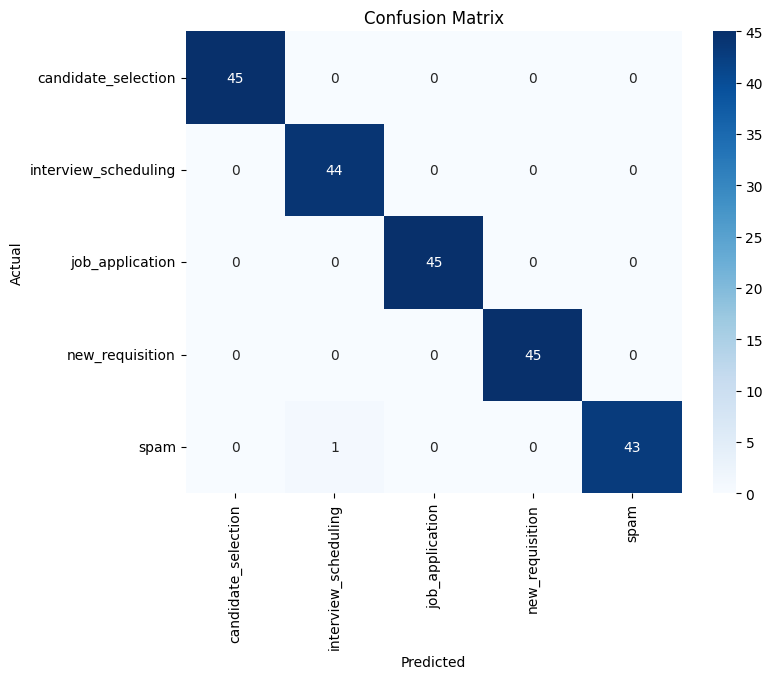

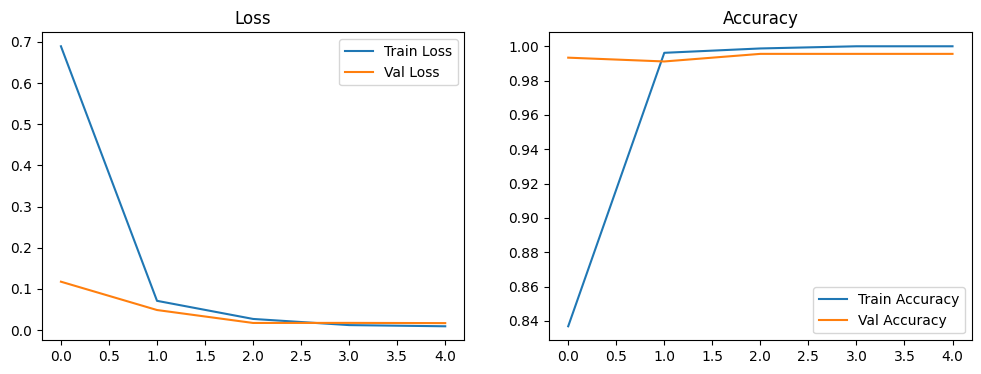

{'predicted_class': 'job_application', 'confidence': 0.974174976348877}


INFO:tensorflow:Assets written to: bert_ats_model1\assets


INFO:tensorflow:Assets written to: bert_ats_model1\assets


('bert_ats_tokenizer1\\tokenizer_config.json',
 'bert_ats_tokenizer1\\special_tokens_map.json',
 'bert_ats_tokenizer1\\vocab.txt',
 'bert_ats_tokenizer1\\added_tokens.json',
 'bert_ats_tokenizer1\\tokenizer.json')

In [5]:
# ===================== COMPLETE BERT-BASED ATS EMAIL CLASSIFIER =====================
# Copy–Paste Ready | Includes EarlyStopping, ReduceLROnPlateau, Class Weights,
# Dataset Balancing, Stratified Splits, Overfitting Controls, and Safe BERT Loading
# ==================================================================================

# ---------- STEP 0: IMPORT LIBRARIES ----------
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from transformers import BertTokenizerFast, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# ---------- STEP 1: LOAD & CLEAN DATA ----------
df = pd.read_csv("final_training_data1.csv")
df.columns = ["label", "text"]

df = df.dropna(subset=["label", "text"])
df = df.drop_duplicates(subset=["text"])
df = df.sample(frac=1, random_state=42)

print("Original Class Distribution:")
print(df["label"].value_counts())


# ---------- STEP 2: BALANCE DATASET (ANTI-IMBALANCE) ----------
df_balanced = df.groupby("label").apply(
    lambda x: x.sample(min(len(x), 450), random_state=42)
).reset_index(drop=True)

print("\nBalanced Class Distribution:")
print(df_balanced["label"].value_counts())


# ---------- STEP 3: LABEL ENCODING ----------
label_encoder = LabelEncoder()
df_balanced["label_encoded"] = label_encoder.fit_transform(df_balanced["label"])

num_classes = df_balanced["label_encoded"].nunique()
print("\nClasses:", label_encoder.classes_)


# ---------- STEP 4: TRAIN / VAL / TEST SPLIT (STRATIFIED) ----------
X_train, X_temp, y_train, y_temp = train_test_split(
    df_balanced["text"],
    df_balanced["label_encoded"],
    test_size=0.3,
    stratify=df_balanced["label_encoded"],
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.33,
    stratify=y_temp,
    random_state=42
)

print(f"\nTrain: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


# ---------- STEP 5: LOAD BERT TOKENIZER ----------
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")


# ---------- STEP 6: TOKENIZATION FUNCTION ----------
def bert_encode(texts, tokenizer, max_len=256):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=max_len,
        return_tensors="tf"
    )

train_enc = bert_encode(X_train, tokenizer)
val_enc   = bert_encode(X_val, tokenizer)
test_enc  = bert_encode(X_test, tokenizer)


# ---------- STEP 7: CLASS WEIGHTS (ANTI-IMBALANCE) ----------
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print("\nClass Weights:", class_weight_dict)


# ---------- STEP 8: LOAD BERT MODEL (SAFE LOAD FIX) ----------
model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_classes,
    from_pt=True  # fixes safetensors / safe_open error
)


# ---------- STEP 9: COMPILE MODEL (LOW LR = LESS OVERFITTING) ----------
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)



model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


# ---------- STEP 10: CALLBACKS ----------
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=1,
    min_lr=1e-7,
    verbose=1
)


# ---------- STEP 11: TRAIN MODEL ----------
history = model.fit(
    dict(train_enc),
    y_train,
    validation_data=(dict(val_enc), y_val),
    epochs=5,          # BERT converges fast
    batch_size=16,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


# ---------- STEP 12: EVALUATE ON TEST SET ----------
test_preds = model.predict(dict(test_enc))
y_pred = np.argmax(test_preds.logits, axis=1)

print("\n--- Classification Report ---")
print(classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_,
    digits=4
))


# ---------- STEP 13: CONFUSION MATRIX ----------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# ---------- STEP 14: TRAINING CURVES ----------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()


# ---------- STEP 15: CONFIDENCE-AWARE PREDICTION ----------
def predict_email(text, threshold=0.7):
    enc = tokenizer(
        text,
        return_tensors="tf",
        truncation=True,
        padding=True,
        max_length=256
    )

    logits = model(enc).logits
    probs = tf.nn.softmax(logits, axis=1)
    idx = tf.argmax(probs, axis=1).numpy()[0]
    confidence = float(probs[0][idx])

    result = {
        "predicted_class": label_encoder.classes_[idx],
        "confidence": confidence
    }

    if confidence < threshold:
        result["warning"] = "Low confidence prediction"

    return result


# ---------- STEP 16: SAMPLE PREDICTION ----------
print(predict_email("Dear HR, I am applying for the Data Scientist position."))


# ---------- STEP 17: SAVE MODEL & TOKENIZER ----------
model.save("bert_ats_model1")
tokenizer.save_pretrained("bert_ats_tokenizer1")

# ===================== END OF COMPLETE CODE =====================


In [6]:
sample_email = """Subject: 🚨 Urgent! Your Account Has Been Compromised – Verify Now

Dear Customer,

We detected suspicious activity on your account. For your safety, we have temporarily limited access to your account.

To restore full access, please verify your details immediately by clicking the secure link below:

👉 Verify Your Account Now

Failure to verify within 24 hours may result in permanent suspension of your account.

Thank you for your prompt attention.

Sincerely,
Security Team
Customer Support Department"""
print(predict_email(sample_email))


{'predicted_class': 'spam', 'confidence': 0.9041456580162048}


In [7]:
print(predict_email("Dear HR, I am applying for the Data Scientist position."))


{'predicted_class': 'job_application', 'confidence': 0.974174976348877}


In [8]:
# ---------------- SAMPLE EMAILS FOR EACH CATEGORY ----------------

sample_emails = {
    "job_application": [
        "Dear HR, I am writing to apply for the Data Scientist position at your organization.",
        "Please find attached my resume for the Software Engineer role.",
        "I am interested in the open Machine Learning Engineer position and would like to apply."
    ],

    "interview_scheduling": [
        "Dear Candidate, your interview is scheduled for Monday at 11 AM. Please confirm.",
        "We would like to schedule a technical interview for the next round.",
        "Kindly let us know your availability for the interview this week."
    ],

    "candidate_selection": [
        "Congratulations! You have been selected for the Data Analyst role.",
        "We are pleased to inform you that you have cleared all interview rounds.",
        "You have been shortlisted and selected. Our HR team will contact you shortly."
    ],

    "spam": [
        "URGENT!!! You have won a free iPhone. Click here to claim now!",
        "Congratulations, you are selected for a cash prize. Act fast!",
        "Limited time offer!!! Earn money from home with zero investment."
    ]
}

# ---------------- RUN PREDICTIONS ----------------

for category, emails in sample_emails.items():
    print(f"\n================ CATEGORY: {category.upper()} ================")
    
    for email in emails:
        result = predict_email(email)
        print(f"\nEmail: {email}")
        print(f"Prediction: {result}")



================ CATEGORY: JOB_APPLICATION ================

Email: Dear HR, I am writing to apply for the Data Scientist position at your organization.
Prediction: {'predicted_class': 'job_application', 'confidence': 0.9850926995277405}

Email: Please find attached my resume for the Software Engineer role.
Prediction: {'predicted_class': 'job_application', 'confidence': 0.9893084764480591}

Email: I am interested in the open Machine Learning Engineer position and would like to apply.
Prediction: {'predicted_class': 'job_application', 'confidence': 0.9758139252662659}

================ CATEGORY: INTERVIEW_SCHEDULING ================

Email: Dear Candidate, your interview is scheduled for Monday at 11 AM. Please confirm.
Prediction: {'predicted_class': 'interview_scheduling', 'confidence': 0.9063847661018372}

Email: We would like to schedule a technical interview for the next round.
Prediction: {'predicted_class': 'spam', 'confidence': 0.4196885824203491, 'warning': 'Low confidence pr

In [ ]:
# from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# import torch
# from torch.utils.data import Dataset

# # Encode labels
# label_encoder = LabelEncoder()
# df['category_encoded'] = label_encoder.fit_transform(df['category'])
# num_labels = len(label_encoder.classes_)

# # Split data
# train_texts, test_texts, train_labels, test_labels = train_test_split(
#     df['email_text'].tolist(), df['category_encoded'].tolist(), test_size=0.2, random_state=42, stratify=df['category_encoded']
# )

# # Custom Dataset class
# class EmailDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len=512):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         text = self.texts[idx]
#         label = self.labels[idx]
#         encoding = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_len,
#             return_token_type_ids=False,
#             padding='max_length',
#             truncation=True,
#             return_attention_mask=True,
#             return_tensors='pt'
#         )
#         return {
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'labels': torch.tensor(label, dtype=torch.long)
#         }

# # Load BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# # Create datasets
# train_dataset = EmailDataset(train_texts, train_labels, tokenizer)
# test_dataset = EmailDataset(test_texts, test_labels, tokenizer)

# # Training arguments
# training_args = TrainingArguments(
#     output_dir='./results',
#     num_train_epochs=3,  # Fewer epochs for BERT to avoid overfitting
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     logging_steps=10,
#     eval_strategy="epoch",
#     save_strategy="epoch",
#     load_best_model_at_end=True,
# )

# # Trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=test_dataset,
# )

# # Train the model
# trainer.train()

# # Evaluate
# trainer.evaluate()

# # Function to predict
# def predict_bert(text):
#     encoding = tokenizer.encode_plus(
#         text,
#         add_special_tokens=True,
#         max_length=512,
#         return_token_type_ids=False,
#         padding='max_length',
#         truncation=True,
#         return_attention_mask=True,
#         return_tensors='pt'
#     )
#     with torch.no_grad():
#         outputs = model(**encoding)
#         predictions = torch.argmax(outputs.logits, dim=1)
#     return label_encoder.inverse_transform(predictions.numpy())[0]

# # Test on sample
# test_email = "I am applying for the data analyst position. Attached is my resume."
# print(f"BERT Predicted Category: {predict_bert(test_email)}")

# # Test on all categories
# unique_categories = df['category'].unique()
# print("BERT Testing predictions for sample emails from each category:")
# for cat in unique_categories:
#     sample_email = df[df['category'] == cat]['email_text'].sample(1).values[0][:200]
#     predicted = predict_bert(sample_email)
#     print(f"Category: {cat}")
#     print(f"Predicted: {predicted}")
#     print("-" * 50)